## p.d.f. of the log

##### Exercise on the transformation of random variables

1. Use numpy to draw $N$ random samples from a uniform distribution between 0.1 and 10, and store these samples as $x$
2. Use matplotlib to make a histogram of these samples
3. Compute the base-10 log of your array $x$, and store this as $y$
4. Make another histogram for y. Using the equation to transform propability distributions, write what the theoretical pdf of $y$ is, and overplot it onto your histogram
5. Compute the log of the mean of $x$ and the mean of $y$. Now compute the log of the *median* of $x$ and $y$.

Text(0.5, 1.0, '$p(y) dy = \\frac{10^{y}}{log(e)} \\ \\frac{1}{10-0.1} dy$')

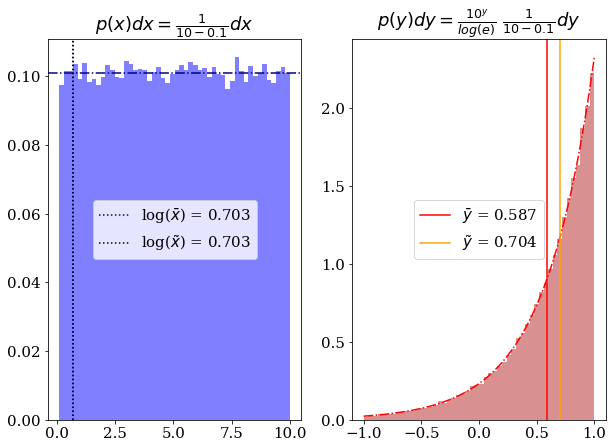

In [86]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 7]
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'serif'

N = 100000
x = np.random.uniform(0.1,10,N)
y = np.log10(x)

fig, axs = plt.subplots(1,2)
ax = axs.ravel()

# "hx/hy = " solo per far tacere il terminale
hx = ax[0].hist(x, bins=50, color='blue',alpha=0.5, density=True) 
hy = ax[1].hist(y, bins=50, color='firebrick', alpha=0.5, density=True)

logx = np.linspace(-1,1,100)
py = lambda my_x : 10**my_x * ( np.log10(np.e) )**(-1) * (10-0.1) **(-1)

ax[0].axhline(1/(10-0.1), c='navy', ls='-.')
ax[1].plot( logx, py(logx), color='red', ls='-.')

LogMean = np.around(np.log10(np.mean(x)),3)
MeanLog = np.around(np.mean(y),3)
# print('LogMean vs. MeanLog : ',LogMean, ' vs. ', MeanLog)

LogMedian = np.around(np.log10(np.median(x)),3)
MedianLog = np.around(np.median(y),3)
# print('LogMedian vs. MedianLog : ', LogMedian, ' vs. ', MedianLog)

ax[0].axvline(LogMean,c='navy',label=r'log($\bar{x}$) = '+str(LogMean), ls=':')
ax[0].axvline(LogMedian,c='k', label=r'log($\tilde{x}$) = '+str(LogMean), ls=':')
ax[0].legend(loc='center')

ax[1].axvline(MeanLog,c='red',label=r'$\bar{y}$ = ' +str(MeanLog))
ax[1].axvline(MedianLog,c='orange', label=r'$\tilde{y}$ = ' +str(MedianLog))
ax[1].legend(loc='center')

title = r'$p(x) dx = \frac{1}{10-0.1} dx$'
ax[0].set_title(title)
title = r'$p(y) dy = \frac{10^{y}}{log(e)} \ \frac{1}{10-0.1} dy$'
ax[1].set_title(title)